<a href="https://colab.research.google.com/github/InutilemMachina/DataSciRepo/blob/main/SVM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Classification

scikitlearn classes for svm

| Class        | Time complexity           | Out-of-core support  | Scaling required  | Kernel trick |
| ------------- |:-------------:| -----:|-----:|-----:|
| LinearSVC      | O(m × n) | No | Yes | No |
| SVC      | O(m2 × n) to O(m3 × n)      |   No | Yes | Yes |
| SGDClassifier | O(m × n)      |    Yes | Yes | No |



## LinearSVC

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

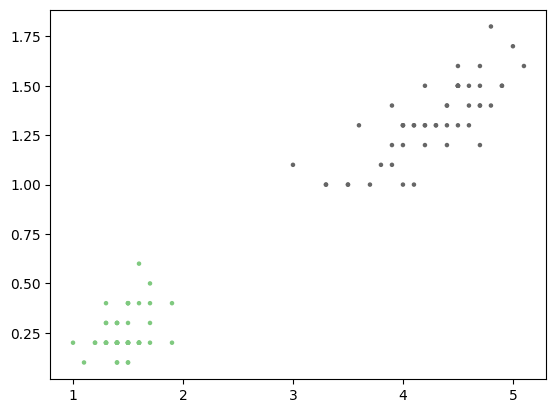

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], 5, y, cmap = 'Accent')

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42).fit(X_scaled, y)  # uses loss="squared_hinge" by default,
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)  # SVC class uses an RBF kernel by default,
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)  # SGDClassifier class does not have a C hyperparameter, but alpha

The `coef_` attribute contains the coefficients of the hyperplane, while the `intercept_` attribute contains the intercept. The coefficients correspond to the weights assigned to each feature in the hyperplane equation. The coefficients and intercept can be used to define a line in two dimensions or a plane in three dimensions that separates the two classes.

In [ ]:
print(lin_clf.intercept_, lin_clf.coef_)
print(svc_clf.intercept_, svc_clf.coef_)
print(sgd_clf.intercept_, sgd_clf.coef_)

[0.28475098] [[1.05364854 1.09903804]]
[0.31896852] [[1.1203284  1.02625193]]
[0.29381534] [[0.8929578  0.81042361]]


In this case, since we have two-dimensional data, we can define a line using the coefficients and intercept. Specifically, we can use the formula:

    w0 * x0 + w1 * x1 + b = 0

where `x0` and `x1` are the two features of our data, `w0` and `w1` are the coefficients of the hyperplane, and `b` is the intercept.

 We can rearrange this formula to solve for `x1` in terms of `x0`, which gives us:

    x1 = -(w0 / w1) * x0 - (b / w1)

This is a formula for a line in slope-intercept form, where the slope is `-w0 / w1` and the y-intercept is `-b / w1`. This line represents the decision boundary between the two classes.

In [ ]:
def decision_boundaries(model,xmin,xmax):
    import numpy as np
    xx = np.array([xmin,xmax])

    # w0 * x0 + w1 * x1 + b = 0
    w0 = model.coef_[0,0]
    w1 = model.coef_[0,1]
    b = model.intercept_[0]
    # x1 = -(w0 / w1) * x0 - (b / w1)
    # (y = m*x + b) alakban:
    M = - (w0 / w1)
    B = - (b / w1)

    # for standardized features (X_scaled), since we assume X is scaled beforehand
    decision_boundary = M*xx + B  # "y_scaled" corresponding to [xmin, xmax]
    margin = 1/w1

    return xx, decision_boundary, margin

In [ ]:
xx, decision_boundary, margin= decision_boundaries(lin_clf,-1.,1.)

Text(0.5, 1.0, 'Scaled')

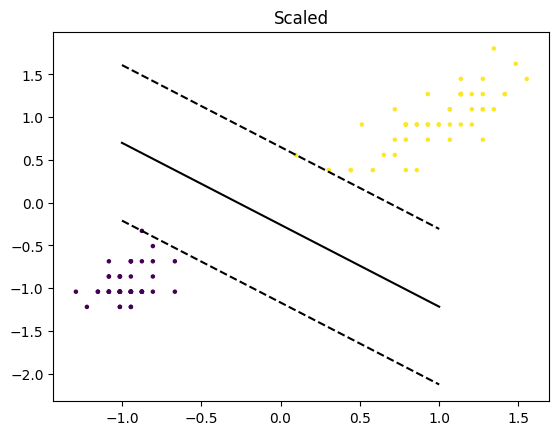

In [ ]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], 5, y)
plt.plot(xx, decision_boundary, 'k-')
plt.plot(xx, decision_boundary + margin, 'k--')
plt.plot(xx, decision_boundary - margin, 'k--')
plt.title('Scaled')

Unscaling the results to the original domain

In [ ]:
m = scaler.mean_  #  The mean value for each feature in the training set.
s = scaler.scale_  # Per feature relative scaling of the data to achieve zero mean and unit variance
m, s

(array([2.861, 0.786]), array([1.44228257, 0.56232019]))

In [ ]:
# decision boundary
def decision_boundaries_unscaling(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-1, -1 * w + b], [1, 1 * w + b]])

In [ ]:
# margin_hi
def decision_margin_hi_unscaling(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-1, -1 * w + b + margin], [1, 1 * w + b + margin]])

In [ ]:
# margin_lo
def decision_margin_lo_unscaling(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-1, -1 * w + b - margin], [1, 1 * w + b - margin]])

In [ ]:
lin_line = decision_boundaries_unscaling(lin_clf)
lin_line_margin_hi = decision_margin_hi_unscaling(lin_clf)
lin_line_margin_lo = decision_margin_lo_unscaling(lin_clf)

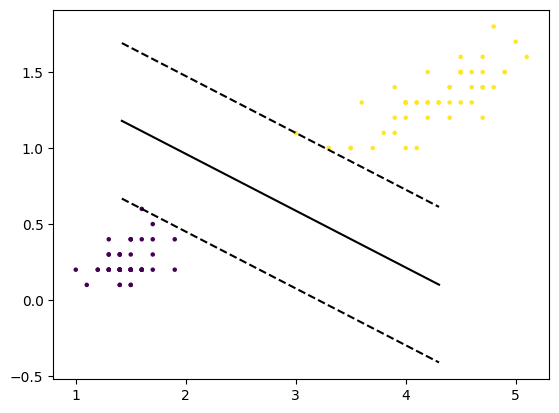

In [ ]:
plt.scatter(X[:,0], X[:,1], 5, y)
plt.plot(lin_line[:, 0], lin_line[:, 1], 'k-')
plt.plot(lin_line_margin_hi[:, 0], lin_line_margin_hi[:, 1], 'k--')
plt.plot(lin_line_margin_lo[:, 0], lin_line_margin_lo[:, 1], 'k--')
plt.title('Unscaled')

# Soft margin classification & hyperparameters
LinearSVC, SVC and SGD supports soft-margin classification but hyperparam-tuning is the business.

Text(0.5, 1.0, 'Original data')

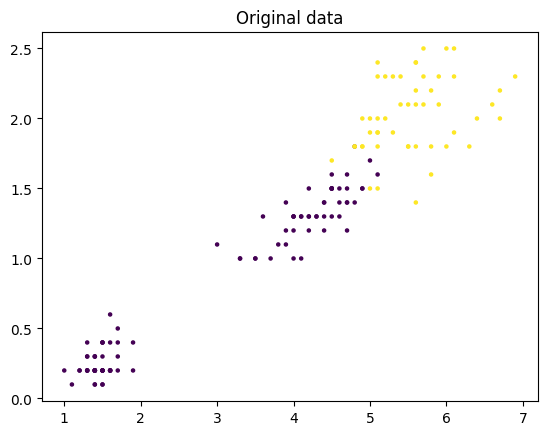

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

plt.scatter(X[:,0], X[:,1], 5, y)
plt.title('Original data')

In [ ]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=100, max_iter=10000, random_state=42))])

In [ ]:
xx1, decision_boundary1, margin1 = decision_boundaries(svm_clf1,-0.5,1.5)
xx2, decision_boundary2, margin2 = decision_boundaries(svm_clf2,-0.5,1.5)

Text(0.5, 1.0, 'Scaled, C=100')

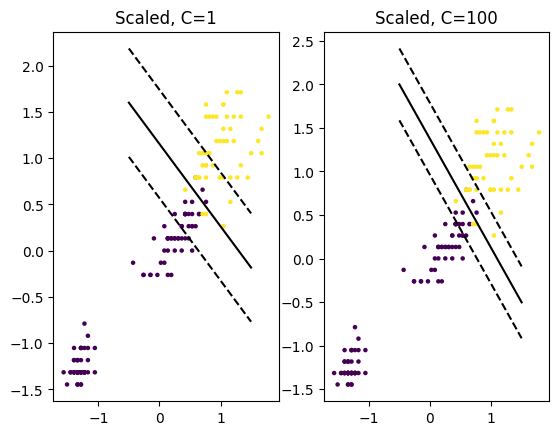

In [ ]:
X_scaled = scaler.fit_transform(X)

fig, ax = plt.subplots(1,2)
ax[0].scatter(X_scaled[:,0], X_scaled[:,1], 5, y)
ax[0].plot(xx1, decision_boundary1, 'k-')
ax[0].plot(xx1, decision_boundary1 + margin1, 'k--')
ax[0].plot(xx1, decision_boundary1 - margin1, 'k--')
ax[0].set_title('Scaled, C=1')

ax[1].scatter(X_scaled[:,0], X_scaled[:,1], 5, y)
ax[1].plot(xx2, decision_boundary2, 'k-')
ax[1].plot(xx2, decision_boundary2 + margin2, 'k--')
ax[1].plot(xx2, decision_boundary2 - margin2, 'k--')
ax[1].set_title('Scaled, C=100')

## Nonlinear SVM Classification
If the data is not linearly separable, we can add newly derived features with polynomial kernels or add similarity features (similarity to landmarks) with Gaussian RBF kernels.
Other kernels exist but are used much more rarely. Some kernels are specialized for specific data structures. String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the Levenshtein distance).

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.15, random_state=1234)
X[:5], y[:5]

(array([[ 1.84457888,  0.51636005],
        [ 1.08094576, -0.72426295],
        [ 0.87099111,  0.76497564],
        [ 0.04832763,  1.02009956],
        [-0.50857848,  0.88929496]]),
 array([1, 1, 0, 0, 0]))

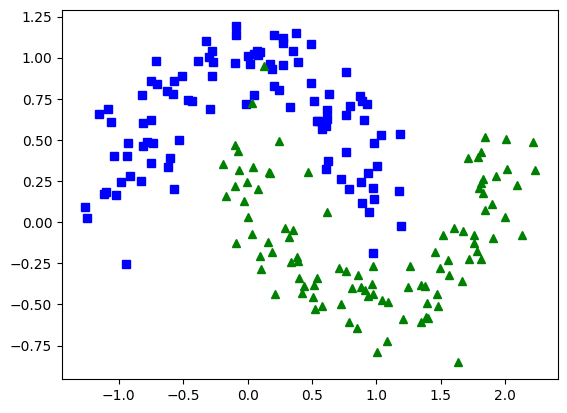

In [ ]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

using polyfeatures and LinearSVC

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynom_svm_clf = make_pipeline(
    PolynomialFeatures(degree = 3),
    StandardScaler(),
    LinearSVC(C = 10, max_iter = 5000, random_state = 1234)
)

polynom_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=5000, random_state=1234))])

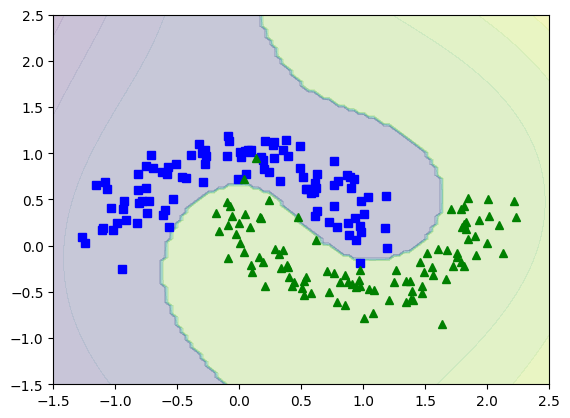

In [ ]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

clf = polynom_svm_clf

x0s = np.linspace(-1.5, +2.5, 100)
x1s = np.linspace(-1.5, +2.5, 100)

x0, x1 = np.meshgrid(x0s, x1s)
X_pred = np.c_[x0.ravel(), x1.ravel()]  # shape for the classifier
#plt.plot(X_pred[:,0],X_pred[:,1],'.')

y_pred = clf.predict(X_pred).reshape(x0.shape)
y_decision = clf.decision_function(X_pred).reshape(x0.shape)

plt.contourf(x0, x1, y_pred, alpha=0.2)
plt.contourf(x0, x1, y_decision, alpha=0.1)

In [ ]:
# plt.plot(x0s)

In [ ]:
#plt.plot(x0)
# plt.show()

In [ ]:
#plt.plot(x1)
# plt.show()

In [ ]:
#plt.plot(X[:,0],X[:,1],'.')
#plt.show()

using SVC with poly kernel

In [ ]:
X, y = make_moons(n_samples=200, noise=0.15, random_state=1234)


from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)) # see that kernel is polynom and also see the regularization parameters

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

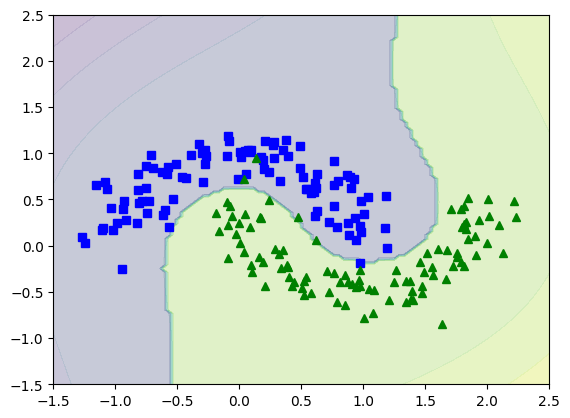

In [ ]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

clf = poly_kernel_svm_clf

x0s = np.linspace(-1.5, +2.5, 100)
x1s = np.linspace(-1.5, +2.5, 100)

x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]  # shape for the classifier
#plt.plot(X[:,0],X[:,1],'.')

y_pred = clf.predict(X).reshape(x0.shape)
y_decision = clf.decision_function(X).reshape(x0.shape)

plt.contourf(x0, x1, y_pred, alpha=0.2)
plt.contourf(x0, x1, y_decision, alpha=0.1)

using Gaussian rbf kernel with SVC

In [ ]:
X, y = make_moons(n_samples=200, noise=0.15, random_state=1234)


rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=0.001))  # see the kernel and hyperparams

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

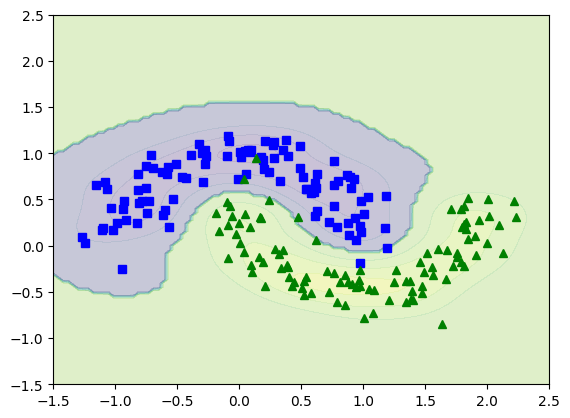

In [ ]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

clf = rbf_kernel_svm_clf

x0s = np.linspace(-1.5, +2.5, 100)
x1s = np.linspace(-1.5, +2.5, 100)

x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]  # shape for the classifier
#plt.plot(X[:,0],X[:,1],'.')

y_pred = clf.predict(X).reshape(x0.shape)
y_decision = clf.decision_function(X).reshape(x0.shape)

plt.contourf(x0, x1, y_pred, alpha=0.2)
plt.contourf(x0, x1, y_decision, alpha=0.1)

# SVM regression

linear SVM reg

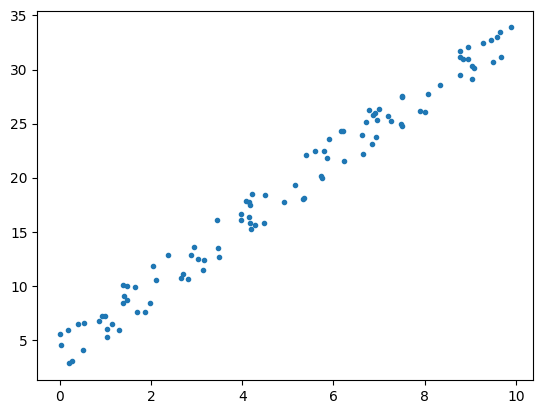

In [ ]:
np.random.seed(1)
X = 10*np.random.rand(100,1)
y = 2 + 3*X + 4*np.random.rand(100,1)
plt.plot(X,y,'.')

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = make_pipeline(
    StandardScaler(),
    LinearSVR(epsilon = 1.5, random_state = 1234)
)

svm_reg.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=1.5, random_state=1234))])

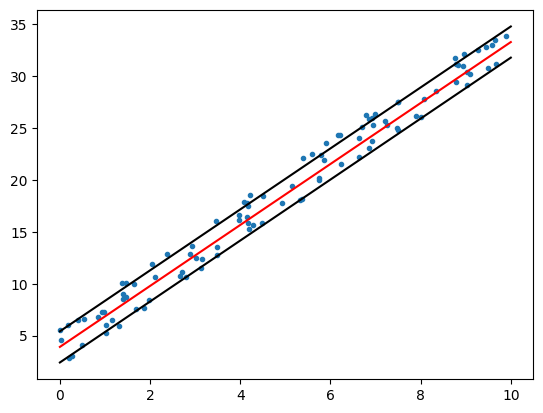

In [ ]:
x_new = np.linspace(0,10,100)
# X.shape # (100, 1)
# x_new.shape # (100,)
y_pred = svm_reg.predict(x_new.reshape(X.shape))

plt.plot(X,y,'.')
plt.plot(x_new, y_pred, "r-", label="Predictions")
plt.plot(x_new, y_pred + svm_reg[-1].epsilon, "k")
plt.plot(x_new, y_pred - svm_reg[-1].epsilon, "k")
plt.show()

polynomial SVC reg

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [32]:
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

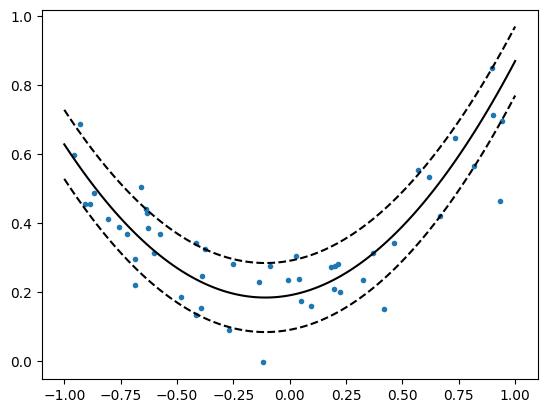

In [33]:
svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg.fit(X, y)

x1s = np.linspace(-1, 1, 100).reshape(100, 1)
y_pred = svm_poly_reg.predict(x1s)
epsilon = svm_poly_reg[-1].epsilon

plt.plot(X, y, ".")  # ez érdekes, hogy az eredeti domain-ban van
plt.plot(x1s, y_pred, "k-")  # ezek meg itt a scaling-után készültek
plt.plot(x1s, y_pred + epsilon, "k--")
plt.plot(x1s, y_pred - epsilon, "k--")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


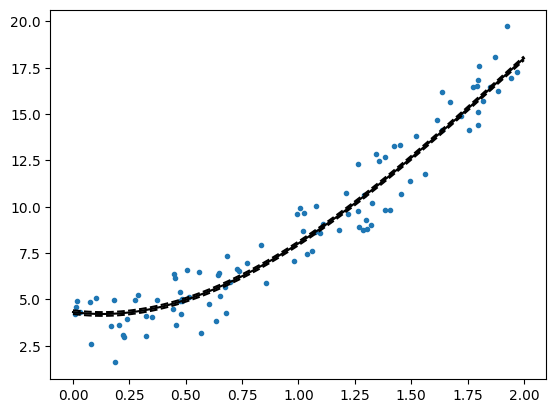

In [26]:
X = 2*np.random.rand(100,1)
y = 1 + 2*X + 3*X**2 + 4*np.random.rand(100,1)

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=3, coef0=1, C=5))
svm_poly_reg.fit(X, y)

x1s = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = svm_poly_reg.predict(x1s)
epsilon = svm_poly_reg[-1].epsilon

plt.plot(X, y, ".")  # ez érdekes, hogy az eredeti domain-ban van
plt.plot(x1s, y_pred, "k-")   # ezek meg itt a scaling-után készültek
plt.plot(x1s, y_pred + epsilon, "k--")
plt.plot(x1s, y_pred - epsilon, "k--")

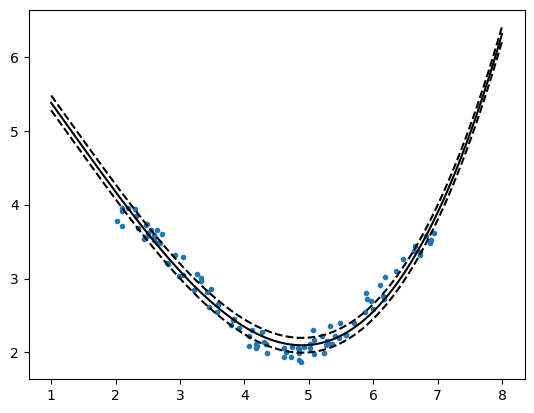

In [37]:
# Step 1: Generate synthetic data
np.random.seed(0)
X = 2 + np.sort(5 * np.random.rand(100, 1), axis=0)
y = 3 + np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=3, coef0=1, C=5))
svm_poly_reg.fit(X, y)

x1s = np.linspace(1, 8, 100).reshape(100, 1)
y_pred = svm_poly_reg.predict(x1s)
epsilon = svm_poly_reg[-1].epsilon

plt.plot(X, y, ".")  # ez érdekes, hogy az eredeti domain-ban van
plt.plot(x1s, y_pred, "k-")   # ezek meg itt a scaling-után készültek
plt.plot(x1s, y_pred + epsilon, "k--")
plt.plot(x1s, y_pred - epsilon, "k--")

gridsearch params:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Create a pipeline with a StandardScaler and an SVR model
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

# Define the parameter grid for the SVR model
param_grid = {
    "svr__kernel": ["linear", "poly", "rbf", "sigmoid"],
    "svr__C": np.linspace(0.1,5.1,5),
    "svr__degree": [1,2,3],
    "svr__coef0": np.linspace(0,4,4),
    "svr__gamma": ["auto", "scale"]
}

# Create a GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y.ravel())

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'svr__C': 10.0, 'svr__coef0': 0.0, 'svr__degree': 1, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}
Best score:  0.9759979812344497


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2400 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packag

## Multiclass classification

SVM-s are designed as binary classifiers. Here multi-class classification is the objective for 3 classes in the target. A one-vs-all approach is necessary. Linear SVM classifier automatically uses the One-vs-All.

In [38]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
wine.data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [39]:
wine.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
#from sklearn.preprocessing import StandardScaler

lin_clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=42))
lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [44]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

0.9774928774928775

In [47]:
from sklearn.svm import SVC

svm_clf = make_pipeline(
    StandardScaler(),
    SVC(random_state=42)
)

cross_val_score(svm_clf, X_train, y_train).mean()

0.9698005698005698

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=9.925589984899778, gamma=0.011986281799901176,
                     random_state=42))])

In [49]:
rnd_search_cv.best_score_

0.9925925925925926

In [50]:
rnd_search_cv.score(X_test, y_test) # test on the test set

0.9777777777777777